In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv')
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


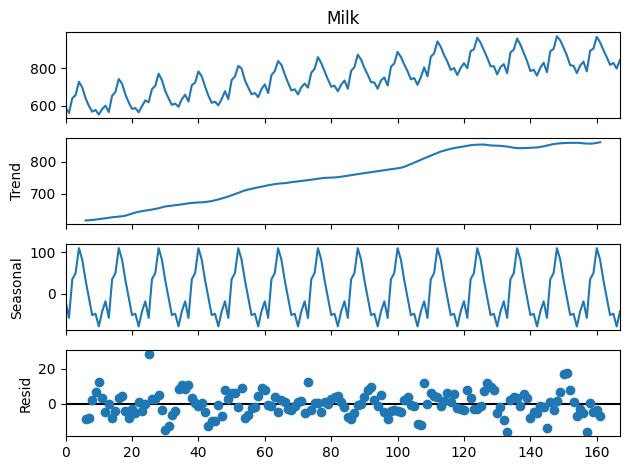

In [4]:
series = df['Milk']
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

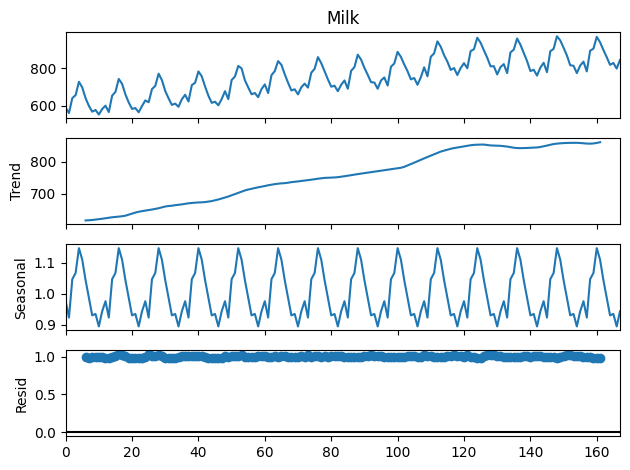

In [5]:
series = df['Milk']
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
plt.show()

Centered Rolling Mean or Moving Average

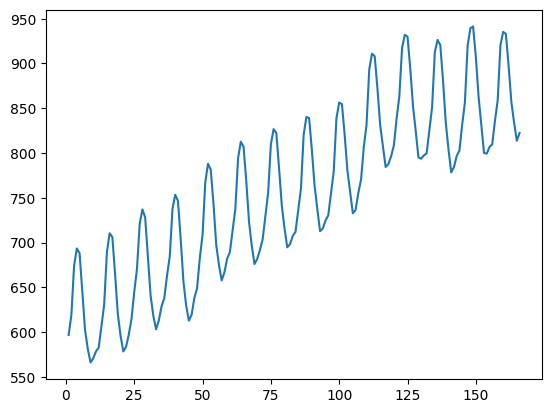

In [6]:
y = df['Milk']
f_cast = y.rolling(window=3, center=True).mean()
plt.plot(f_cast)

TRAILING MEAN

83.33766655400582


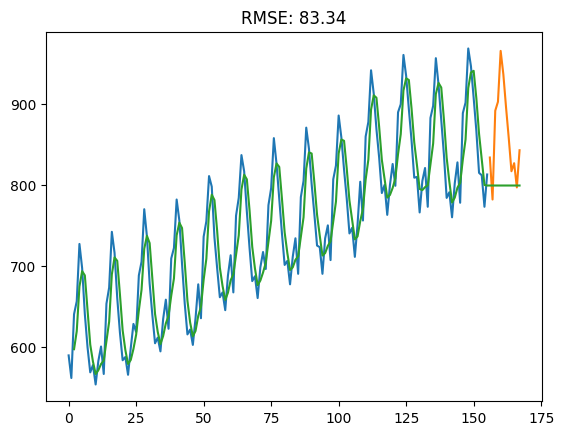

In [7]:
y_train = df['Milk'].iloc[:-12]
y_test = df['Milk'].iloc[-12:]

span = 3
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series], ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, MA_series)
plt.title(f'RMSE: {rmse:.2f}')

print(rmse)

#### Simple Exponential Smoothing


In [8]:
from statsmodels.tsa.api import SimpleExpSmoothing


c:\Users\dai\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


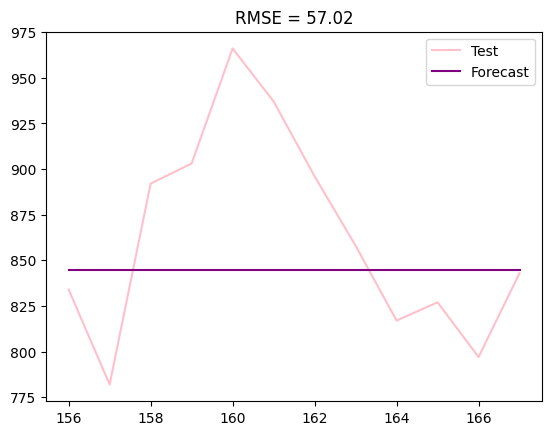

In [9]:
alpha = 0.1
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(color='pink', label='Test')
fcast1.plot(color='purple', label='Forecast')
rmse = root_mean_squared_error(y_test, fcast1)
plt.title(f'RMSE = {rmse:.2f}')
plt.legend(loc='best')
plt.show()

making it interactive

In [10]:
from ipywidgets import interact, widgets

In [11]:
def simple_exp(alpha):
    ses = SimpleExpSmoothing(y_train)
    fit1 = ses.fit(smoothing_level=alpha)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    fcast1.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f'RMSE = {rmse:.2f}')
    plt.legend(loc='best')
    plt.show()

widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), Output()), _d…

<function __main__.simple_exp(alpha)>

## HOLTS, LINEAR TREND


In [12]:
from statsmodels.tsa.api import Holt

alpha = 0.8
beta  = 0.02

holt = Holt(y_train)
def holt_linear(alpha, beta):
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)    
    facst1 = fit1.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    facst1.plot(color='purple', label='Forecast')
    rsme = root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE = {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}')
    plt.legend(loc='best')
    plt.show()

# widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))
widgets.interact(holt_linear,alpha=(0.01,1,0.01), beta=(0.01,1,0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_linear(alpha, beta)>

## HOLT EXP

In [ ]:
from statsmodels.tsa.api import Holt

alpha = 0.8
beta  = 0.02


def holt_both(alpha, beta, val):
    holt = Holt(y_train, exponential=val)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)    
    facst1 = fit1.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    facst1.plot(color='purple', label='Forecast')
    rsme = root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE = {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}')
    plt.legend(loc='best')
    plt.show()

# widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))
widgets.interact(holt_both,alpha=(0.01,1,0.01), beta=(0.01,1,0.01), val=[True, False])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_both(alpha, beta, val)>

## damping -> NOT IN SYLLABUS

In [14]:
from statsmodels.tsa.api import Holt

alpha = 0.8
beta  = 0.02


def holt_both(alpha, beta, phi, val, dampness):
    holt = Holt(y_train, exponential=val, damped_trend=dampness)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)    
    facst1 = fit1.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    facst1.plot(color='purple', label='Forecast')
    rsme = root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE = {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}')
    plt.legend(loc='best')
    plt.show()

# widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))
widgets.interact(holt_both,alpha=(0.01,1,0.01), beta=(0.01,1,0.01), phi=(0.01,1, 0.01),val=[True, False], dampness=[True, False])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_both(alpha, beta, phi, val, dampness)>

Holt Winter's method

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing


alpha = 0.8
beta  = 0.02


def holt_winter(alpha, beta, gamma, seasonality, periods=12):
    holt = ExponentialSmoothing(y_train, trend='add', seasonal=seasonality, seasonal_periods=periods)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)    
    facst1 = fit1.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    facst1.plot(color='purple', label='Forecast')
    rsme = root_mean_squared_error(y_test, fcast1)
    plt.title(f'RMSE = {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}, gamma = {gamma:.2f}')
    plt.legend(loc='best')
    plt.show()

# widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))
widgets.interact(holt_winter,alpha=(0.01,1,0.01), beta=(0.01,1,0.01), gamma=(0.01,1, 0.01),seasonality=['mul', 'add'])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_winter(alpha, beta, gamma, seasonality, periods=12)>